In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV 

In [2]:
from __future__ import print_function
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

In [4]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [8]:
import lime
from lime import lime_tabular

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [11]:
data3000 = pd.read_csv('feature_mat_trans_labelled.csv')

In [12]:
data3000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9319 entries, 0 to 9318
Columns: 2980 entries, probe to cg06806080
dtypes: float64(2978), object(2)
memory usage: 211.9+ MB


In [13]:
np.random.seed(42)

In [14]:
data3000.head()

probe        Labels  cg00002426  cg00003994  cg00005847  cg00007981  \
0  GSM1098769   UCEC.Normal    0.436050    0.074984    0.893554    0.026659   
1  GSM1098770   UCEC.Normal    0.448136    0.040227    0.919923    0.025979   
2  GSM1098771   UCEC.Normal    0.409466    0.050360    0.909398    0.024230   
3  GSM1098772  UCEC.Primary    0.437174    0.076287    0.858700    0.029286   
4  GSM1098773  UCEC.Primary    0.447186    0.083306    0.886190    0.027149   

   cg00008493  cg00008713  cg00009407  cg00011459  ...  cg06154570  \
0    0.900775    0.075170    0.032180    0.907548  ...    0.353745   
1    0.914231    0.071295    0.035460    0.931793  ...    0.348272   
2    0.935521    0.065115    0.034236    0.906213  ...    0.376057   
3    0.918484    0.057078    0.037669    0.917991  ...    0.366986   
4    0.929991    0.086450    0.043569    0.923754  ...    0.436988   

   cg06186808  cg06200697  cg06274159  cg06320982  cg06334284  cg06403553  \
0    0.795657    0.265349    0.097189    0.076978    0.029318    0.942113   
1    0.815388    0.221601    0.060253    0.072997    0.030797    0.929402   
2    0.817406    0.235482    0.066371    0.063594    0.027764    0.953561   
3    0.779472    0.202336    0.088788    0.049972    0.038165    0.945963   
4    0.807666    0.266915    0.063300    0.060651    0.031231    0.954144   

   cg06654134  cg06779945  cg06806080  
0    0.020709    0.026417    0.802901  
1    0.028679    0.029687    0.740046  
2    0.017919    0.031894    0.792316  
3    0.026818    0.033895    0.755296  
4    0.024967    0.034382    0.745931  

[5 rows x 2980 columns]

In [15]:
data3000.Labels.nunique()

55

In [16]:
data3000.Labels.unique()

array(['UCEC.Normal', 'UCEC.Primary', 'GBM.Primary', 'GBM.Normal',
       'OV.Primary', 'OV.Metastatic', 'OV.Normal', 'UCEC.Metastatic',
       'PRAD.Normal', 'PRAD.Primary', 'PRAD.Metastatic', 'COAD.Normal',
       'COAD.Metastatic', 'LUAD.Normal', 'BRCA.Primary',
       'BRCA.Metastatic', 'BRCA.Normal', 'LUAD.Primary', 'LUSC.Primary',
       'LUSC.Normal', 'BLCA.Primary', 'ESCA.Primary', 'PAAD.Primary',
       'KIRP.Primary', 'LIHC.Primary', 'CESC.Primary', 'SARC.Primary',
       'THYM.Primary', 'COAD.Primary', 'STAD.Primary', 'SKCM.Metastatic',
       'CHOL.Primary', 'KIRC.Primary', 'THCA.Primary', 'HNSC.Primary',
       'KIRC.Normal', 'KIRP.Normal', 'READ.Primary', 'READ.Normal',
       'LIHC.Normal', 'SKCM.Primary', 'THCA.Normal', 'BLCA.Normal',
       'STAD.Normal', 'HNSC.Normal', 'THCA.Metastatic', 'CESC.Normal',
       'SKCM.Normal', 'SARC.Normal', 'PAAD.Normal', 'ESCA.Normal',
       'PCPG.Primary', 'PCPG.Normal', 'CHOL.Normal', 'THYM.Normal'],
      dtype=object)

In [17]:
data3000.Labels.value_counts()

BRCA.Primary       802
OV.Primary         679
PRAD.Primary       570
HNSC.Primary       523
THCA.Primary       503
LUAD.Primary       456
UCEC.Primary       454
BLCA.Primary       412
STAD.Primary       393
LIHC.Primary       374
SKCM.Metastatic    367
LUSC.Primary       364
KIRC.Primary       312
CESC.Primary       306
COAD.Primary       287
KIRP.Primary       271
SARC.Primary       257
GBM.Primary        205
ESCA.Primary       183
PAAD.Primary       183
PCPG.Primary       178
KIRC.Normal        157
THYM.Primary       124
SKCM.Primary       104
READ.Primary        93
BRCA.Normal         91
PRAD.Normal         69
COAD.Normal         58
THCA.Normal         56
UCEC.Metastatic     53
HNSC.Normal         50
LIHC.Normal         50
KIRP.Normal         43
LUSC.Normal         41
CHOL.Primary        36
UCEC.Normal         36
LUAD.Normal         33
BLCA.Normal         21
BRCA.Metastatic     17
ESCA.Normal         15
PRAD.Metastatic     11
OV.Normal           10
PAAD.Normal         10
COAD.Metast

In [18]:
# delete rows which have <= 4 labels
indexNames = data3000[(data3000['Labels'] == 'SARC.Normal')].index
# Delete these row indexes from dataFrame
data3000.drop(indexNames , inplace=True)

In [19]:
indexNames = data3000[(data3000['Labels'] == 'CESC.Normal')].index
# Delete these row indexes from dataFrame
data3000.drop(indexNames , inplace=True)

In [20]:
indexNames = data3000[(data3000['Labels'] == 'PCPG.Normal')].index
# Delete these row indexes from dataFrame
data3000.drop(indexNames , inplace=True)

In [21]:
indexNames = data3000[(data3000['Labels'] == 'THYM.Normal')].index
# Delete these row indexes from dataFrame
data3000.drop(indexNames , inplace=True)

In [22]:
indexNames = data3000[(data3000['Labels'] == 'STAD.Normal')].index
# Delete these row indexes from dataFrame
data3000.drop(indexNames , inplace=True)

In [23]:
indexNames = data3000[(data3000['Labels'] == 'SKCM.Normal')].index
# Delete these row indexes from dataFrame
data3000.drop(indexNames , inplace=True)

In [24]:
data3000.Labels.value_counts()

BRCA.Primary       802
OV.Primary         679
PRAD.Primary       570
HNSC.Primary       523
THCA.Primary       503
LUAD.Primary       456
UCEC.Primary       454
BLCA.Primary       412
STAD.Primary       393
LIHC.Primary       374
SKCM.Metastatic    367
LUSC.Primary       364
KIRC.Primary       312
CESC.Primary       306
COAD.Primary       287
KIRP.Primary       271
SARC.Primary       257
GBM.Primary        205
ESCA.Primary       183
PAAD.Primary       183
PCPG.Primary       178
KIRC.Normal        157
THYM.Primary       124
SKCM.Primary       104
READ.Primary        93
BRCA.Normal         91
PRAD.Normal         69
COAD.Normal         58
THCA.Normal         56
UCEC.Metastatic     53
HNSC.Normal         50
LIHC.Normal         50
KIRP.Normal         43
LUSC.Normal         41
CHOL.Primary        36
UCEC.Normal         36
LUAD.Normal         33
BLCA.Normal         21
BRCA.Metastatic     17
ESCA.Normal         15
PRAD.Metastatic     11
PAAD.Normal         10
OV.Normal           10
COAD.Metast

In [25]:
data3000

probe        Labels  cg00002426  cg00003994  cg00005847  \
0          GSM1098769   UCEC.Normal    0.436050    0.074984    0.893554   
1          GSM1098770   UCEC.Normal    0.448136    0.040227    0.919923   
2          GSM1098771   UCEC.Normal    0.409466    0.050360    0.909398   
3          GSM1098772  UCEC.Primary    0.437174    0.076287    0.858700   
4          GSM1098773  UCEC.Primary    0.447186    0.083306    0.886190   
...               ...           ...         ...         ...         ...   
9314  TCGA.ZS.A9CG.01  LIHC.Primary    0.260311    0.066188    0.512037   
9315  TCGA.ZT.A8OM.01  THYM.Primary    0.648393    0.046773    0.220836   
9316  TCGA.ZU.A8S4.01  CHOL.Primary    0.596343    0.060194    0.382314   
9317  TCGA.ZU.A8S4.11   CHOL.Normal    0.525024    0.061355    0.163317   
9318  TCGA.ZX.AA5X.01  CESC.Primary    0.447592    0.464063    0.523608   

      cg00007981  cg00008493  cg00008713  cg00009407  cg00011459  ...  \
0       0.026659    0.900775    0.075170    0.032180    0.907548  ...   
1       0.025979    0.914231    0.071295    0.035460    0.931793  ...   
2       0.024230    0.935521    0.065115    0.034236    0.906213  ...   
3       0.029286    0.918484    0.057078    0.037669    0.917991  ...   
4       0.027149    0.929991    0.086450    0.043569    0.923754  ...   
...          ...         ...         ...         ...         ...  ...   
9314    0.026463    0.952542    0.098548    0.033848    0.925793  ...   
9315    0.024113    0.895551    0.078428    0.035608    0.777949  ...   
9316    0.028023    0.937967    0.046913    0.032673    0.935719  ...   
9317    0.026504    0.879054    0.063628    0.037987    0.946712  ...   
9318    0.024910    0.930137    0.043384    0.026667    0.929853  ...   

      cg06154570  cg06186808  cg06200697  cg06274159  cg06320982  cg06334284  \
0       0.353745    0.795657    0.265349    0.097189    0.076978    0.029318   
1       0.348272    0.815388    0.221601    0.060253    0.072997    0.030797   
2       0.376057    0.817406    0.235482    0.066371    0.063594    0.027764   
3       0.366986    0.779472    0.202336    0.088788    0.049972    0.038165   
4       0.436988    0.807666    0.266915    0.063300    0.060651    0.031231   
...          ...         ...         ...         ...         ...         ...   
9314    0.485316    0.757731    0.481846    0.081013    0.044266    0.029338   
9315    0.267732    0.758771    0.624036    0.091590    0.158040    0.020283   
9316    0.341995    0.839524    0.490146    0.430134    0.087489    0.024854   
9317    0.315696    0.521575    0.471292    0.084758    0.037118    0.032915   
9318    0.318568    0.866273    0.511065    0.703903    0.082463    0.032058   

      cg06403553  cg06654134  cg06779945  cg06806080  
0       0.942113    0.020709    0.026417    0.802901  
1       0.929402    0.028679    0.029687    0.740046  
2       0.953561    0.017919    0.031894    0.792316  
3       0.945963    0.026818    0.033895    0.755296  
4       0.954144    0.024967    0.034382    0.745931  
...          ...         ...         ...         ...  
9314    0.869177    0.035146    0.018033    0.790972  
9315    0.923744    0.031059    0.028374    0.652660  
9316    0.843199    0.033082    0.027194    0.779793  
9317    0.924528    0.039428    0.027978    0.669977  
9318    0.924184    0.029736    0.023050    0.859514  

[9303 rows x 2980 columns]

In [26]:
data3000['target'] = data3000['Labels']

In [27]:
data3000.drop('Labels', axis = 1, inplace = True)

In [28]:
data3000.drop('probe', axis = 1, inplace = True)

In [29]:
data3000.shape

(9303, 2979)

In [126]:
data3000.to_csv('Cancer_3000features.csv')

## PCA

In [22]:
rndperm = np.random.permutation(data500.shape[0])

In [20]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data500.iloc[:,:-1].values)
data500['pca-one'] = pca_result[:,0]
data500['pca-two'] = pca_result[:,1] 
data500['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.13741208 0.10518294 0.05912985]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

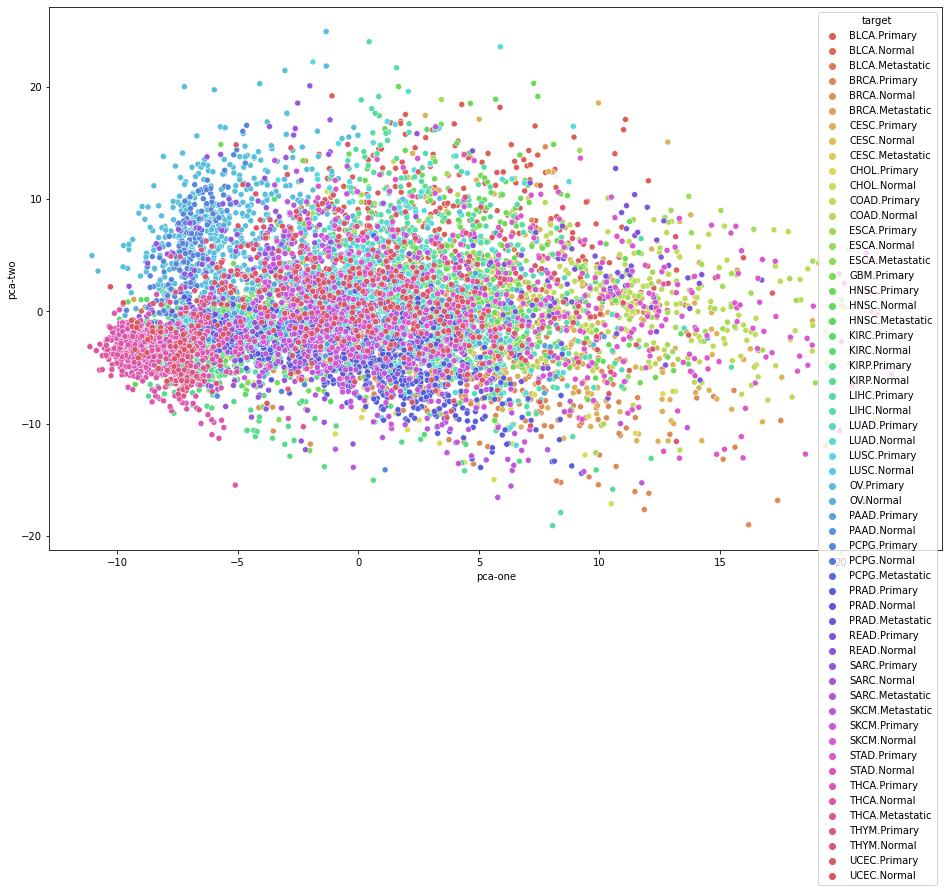

In [51]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=pd.Series(targets),
    palette=sns.color_palette("hls", pd.Series(targets).nunique()),
    data=data500.loc[rndperm,:],
    legend="full",
    alpha=1
)

## T-SNE

In [36]:
targets = data500.target

In [37]:
data500.drop('target', axis = 1, inplace = True)

In [38]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data500)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8868 samples in 29.219s...
[t-SNE] Computed neighbors for 8868 samples in 1340.871s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8868
[t-SNE] Computed conditional probabilities for sample 2000 / 8868
[t-SNE] Computed conditional probabilities for sample 3000 / 8868
[t-SNE] Computed conditional probabilities for sample 4000 / 8868
[t-SNE] Computed conditional probabilities for sample 5000 / 8868
[t-SNE] Computed conditional probabilities for sample 6000 / 8868
[t-SNE] Computed conditional probabilities for sample 7000 / 8868
[t-SNE] Computed conditional probabilities for sample 8000 / 8868
[t-SNE] Computed conditional probabilities for sample 8868 / 8868
[t-SNE] Mean sigma: 3.334934
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.549240
[t-SNE] KL divergence after 300 iterations: 2.303932
t-SNE done! Time elapsed: 1397.447295665741 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

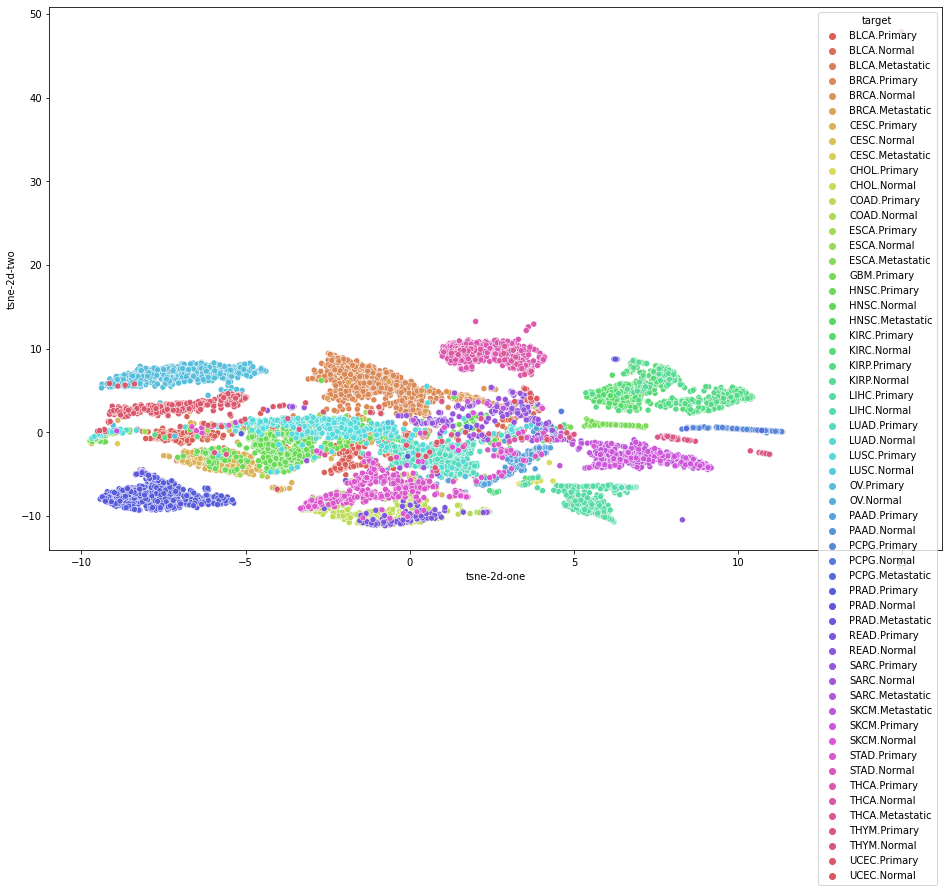

In [48]:
data500['tsne-2d-one'] = tsne_results[:,0]
data500['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=pd.Series(targets),
    palette=sns.color_palette("hls", pd.Series(targets).nunique()),
    data=data500,
    legend="full",
    alpha=1
)

ord_enc = OrdinalEncoder()
data500["labels"] = ord_enc.fit_transform(data500[["target"]])
data500['labels'] = data500['labels'].astype(int)
data500[["target", "labels"]].tail(5)

In [127]:
X = data3000.iloc[:, :-1].values
y = data3000.iloc[:, -1].values

In [128]:
y

array(['UCEC.Normal', 'UCEC.Normal', 'UCEC.Normal', ..., 'CHOL.Primary',
       'CHOL.Normal', 'CESC.Primary'], dtype=object)

In [129]:
data3000["target"].head(2)

0    UCEC.Normal
1    UCEC.Normal
Name: target, dtype: object

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 101)

In [131]:
flag = True
while flag:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True)
    if (pd.Series(y_test).nunique() == pd.Series(y_train).nunique()):
            flag = False

In [132]:
pd.Series(y_train).nunique()

49

In [133]:
pd.Series(y_test).nunique()

49

In [134]:
print(len(X_train))
print(len(X_test))
print(X_train)

7442
1861
[[0.69629451 0.05003428 0.29185837 ... 0.0235816  0.02044674 0.7938478 ]
 [0.11132028 0.1229891  0.51029353 ... 0.04020594 0.02871859 0.71388964]
 [0.61237694 0.22476307 0.30515366 ... 0.02183734 0.02465716 0.84984449]
 ...
 [0.48846163 0.17648103 0.92858844 ... 0.03194522 0.02229889 0.82628129]
 [0.52854252 0.70168972 0.74675467 ... 0.03932484 0.03468053 0.85423238]
 [0.45314581 0.05741511 0.84661449 ... 0.03326175 0.02337466 0.88671093]]


In [135]:
labels = data3000['target']

In [122]:
#data3000.drop('target', axis = 1, inplace = True)

In [136]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, scoring='accuracy',
                     cv=5, refit = True, verbose = 3, n_jobs=-1) 

# fitting the model for grid search 
grid.fit(X_train, y_train)

In [137]:
folds = KFold(5,shuffle = True, random_state=0)
classifier = SVC(probability=True, kernel= 'rbf', random_state=42)
n_classes = data3000.target.nunique()

In [138]:
n_classes

49

In [139]:
for i, (train, test) in enumerate(folds.split(X_train, y_train)):

    classifier.fit(X_train[train], y_train[train])
    
    y_pred = classifier.predict(X_train[test])
    
    conf_mat = confusion_matrix(y_train[test], y_pred)
    print (conf_mat)

    precision = precision_score(y_train[test], y_pred, average='micro')
    print('Precision micro: %.3f' % precision)
    precision = precision_score(y_train[test], y_pred, average='macro')
    print('Precision macro: %.3f' % precision)
    recall = recall_score(y_train[test], y_pred, average='micro')
    print('Recall micro: %.3f' % recall)
    recall = recall_score(y_train[test], y_pred, average='macro')
    print('Recall macro: %.3f' % recall)
    print(accuracy_score(y_train[test], y_pred))
    print(classification_report(y_train[test], y_pred))

[[ 3  3  0 ...  0  0  0]
 [ 0 63  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0 10]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  1 71]]
Precision micro: 0.887
Precision macro: 0.707
Recall micro: 0.887
Recall macro: 0.656
0.8865010073875084
                 precision    recall  f1-score   support

    BLCA.Normal       1.00      0.50      0.67         6
   BLCA.Primary       0.89      0.91      0.90        69
BRCA.Metastatic       0.00      0.00      0.00         2
    BRCA.Normal       1.00      0.93      0.97        15
   BRCA.Primary       0.93      0.98      0.96       122
   CESC.Primary       0.93      0.88      0.90        57
    CHOL.Normal       0.00      0.00      0.00         1
   CHOL.Primary       1.00      0.80      0.89         5
COAD.Metastatic       0.00      0.00      0.00         3
    COAD.Normal       0.90      0.69      0.78        13
   COAD.Primary       0.75      0.94      0.84        49
    ESCA.Normal       0.00      0.00      0.00        

C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 2  1  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  4]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  1  0 68]]
Precision micro: 0.890
Precision macro: 0.696
Recall micro: 0.890
Recall macro: 0.663
0.8898589657488247
                 precision    recall  f1-score   support

    BLCA.Normal       1.00      0.67      0.80         3
   BLCA.Primary       0.91      0.93      0.92        80
BRCA.Metastatic       0.00      0.00      0.00         2
    BRCA.Normal       1.00      0.93      0.96        14
   BRCA.Primary       0.96      0.99      0.97       136
   CESC.Primary       0.95      0.82      0.88        49
    CHOL.Normal       0.00      0.00      0.00         1
   CHOL.Primary       1.00      0.57      0.73         7
COAD.Metastatic       0.00      0.00      0.00         1
    COAD.Normal       0.60      0.50      0.55         6
   COAD.Primary       0.66      0.98      0.79        43
    ESCA.Normal       0.00      0.00      0.00        

C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 1  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  7]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  1  0 55]]
Precision micro: 0.904
Precision macro: 0.712
Recall micro: 0.904
Recall macro: 0.689
0.9038978494623656
                 precision    recall  f1-score   support

    BLCA.Normal       1.00      1.00      1.00         1
   BLCA.Primary       0.94      0.94      0.94        53
BRCA.Metastatic       0.00      0.00      0.00         3
    BRCA.Normal       0.83      0.94      0.88        16
   BRCA.Primary       0.95      0.97      0.96       133
   CESC.Primary       1.00      0.91      0.95        53
    CHOL.Normal       0.00      0.00      0.00         1
   CHOL.Primary       1.00      0.75      0.86         8
    COAD.Normal       0.93      0.82      0.87        17
   COAD.Primary       0.75      0.98      0.85        44
    ESCA.Normal       0.00      0.00      0.00         1
   ESCA.Primary       0.69      0.46      0.55        

C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



[[ 3  1  0 ...  0  0  0]
 [ 0 60  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0  7]
 [ 0  0  0 ...  0  5  0]
 [ 0  1  0 ...  0  2 79]]
Precision micro: 0.888
Precision macro: 0.647
Recall micro: 0.888
Recall macro: 0.641
0.8877688172043011
                 precision    recall  f1-score   support

    BLCA.Normal       1.00      0.75      0.86         4
   BLCA.Primary       0.90      0.94      0.92        64
BRCA.Metastatic       0.00      0.00      0.00         3
    BRCA.Normal       1.00      0.94      0.97        17
   BRCA.Primary       0.97      0.98      0.97       113
   CESC.Primary       0.93      0.98      0.96        44
    CHOL.Normal       0.00      0.00      0.00         2
   CHOL.Primary       1.00      0.50      0.67        10
COAD.Metastatic       0.00      0.00      0.00         2
    COAD.Normal       0.75      0.75      0.75         8
   COAD.Primary       0.61      0.79      0.69        39
    ESCA.Normal       0.00      0.00      0.00       

C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 2  2  0 ...  0  1  0]
 [ 0 72  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  7]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  1 68]]
Precision micro: 0.889
Precision macro: 0.606
Recall micro: 0.889
Recall macro: 0.616
0.8891129032258065
                 precision    recall  f1-score   support

    BLCA.Normal       1.00      0.40      0.57         5
   BLCA.Primary       0.94      0.92      0.93        78
BRCA.Metastatic       0.00      0.00      0.00         2
    BRCA.Normal       1.00      1.00      1.00        13
   BRCA.Primary       0.94      1.00      0.97       120
   CESC.Primary       0.96      0.87      0.91        53
    CHOL.Normal       0.00      0.00      0.00         3
   CHOL.Primary       0.50      1.00      0.67         1
COAD.Metastatic       0.00      0.00      0.00         1
    COAD.Normal       0.71      1.00      0.83         5
   COAD.Primary       0.78      0.90      0.84        42
    ESCA.Normal       0.00      0.00      0.00        

C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
y_pred_cv = classifier.predict(X_test)
print(classification_report(y_test, y_pred_cv))

                 precision    recall  f1-score   support

    BLCA.Normal       0.00      0.00      0.00         2
   BLCA.Primary       0.88      0.97      0.92        68
BRCA.Metastatic       0.00      0.00      0.00         5
    BRCA.Normal       0.82      0.88      0.85        16
   BRCA.Primary       0.94      0.97      0.95       178
   CESC.Primary       1.00      0.88      0.94        50
    CHOL.Normal       0.00      0.00      0.00         1
   CHOL.Primary       1.00      1.00      1.00         5
COAD.Metastatic       0.00      0.00      0.00         3
    COAD.Normal       0.89      0.89      0.89         9
   COAD.Primary       0.73      0.94      0.83        70
    ESCA.Normal       0.00      0.00      0.00         4
   ESCA.Primary       0.75      0.22      0.34        41
     GBM.Normal       1.00      1.00      1.00         1
    GBM.Primary       1.00      0.90      0.95        30
    HNSC.Normal       1.00      0.84      0.91        19
   HNSC.Primary       0.85    

C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
precision_score(y_test, y_pred_cv, average='micro')

0.8876947877485223

In [156]:
recall_score(y_test, y_pred_cv, average='micro')

0.8876947877485223

In [157]:
f1_score(y_test, y_pred_cv, average='micro')

0.8876947877485223

In [141]:
len(y_test)

1861

In [142]:
roc_auc_score(y_test, classifier.predict_proba(X_test), multi_class='ovr')

0.9885826629889479

In [56]:
(uniquet, countst) = np.unique(y_test, return_counts=True)
frequenciest = np.asarray((uniquet, countst)).T
frequenciest

array([['BLCA.Normal', 5],
       ['BLCA.Primary', 83],
       ['BRCA.Normal', 17],
       ['BRCA.Primary', 158],
       ['CESC.Normal', 2],
       ['CESC.Primary', 63],
       ['CHOL.Normal', 1],
       ['CHOL.Primary', 7],
       ['COAD.Normal', 5],
       ['COAD.Primary', 69],
       ['ESCA.Normal', 4],
       ['ESCA.Primary', 38],
       ['GBM.Primary', 31],
       ['HNSC.Normal', 5],
       ['HNSC.Primary', 108],
       ['KIRC.Normal', 29],
       ['KIRC.Primary', 57],
       ['KIRP.Normal', 11],
       ['KIRP.Primary', 52],
       ['LIHC.Normal', 14],
       ['LIHC.Primary', 72],
       ['LUAD.Normal', 6],
       ['LUAD.Primary', 92],
       ['LUSC.Normal', 7],
       ['LUSC.Primary', 74],
       ['OV.Primary', 118],
       ['PAAD.Normal', 3],
       ['PAAD.Primary', 35],
       ['PCPG.Metastatic', 1],
       ['PCPG.Primary', 42],
       ['PRAD.Normal', 11],
       ['PRAD.Primary', 100],
       ['READ.Normal', 1],
       ['READ.Primary', 22],
       ['SARC.Normal', 2],
       ['S

In [57]:
#unique values in y_train that are not in y_test
np.setdiff1d(y_train, y_test)

array(['BLCA.Metastatic', 'BRCA.Metastatic', 'CESC.Metastatic',
       'ESCA.Metastatic', 'HNSC.Metastatic', 'OV.Normal', 'PCPG.Normal',
       'PRAD.Metastatic', 'SARC.Metastatic', 'SKCM.Normal', 'THYM.Normal'],
      dtype=object)

In [59]:
#unique values in y_test that are not in y_train
np.setdiff1d(y_test, y_train)

array([], dtype=object)

# LIME

In [143]:
training_columns = data3000.iloc[:, :-1]

In [144]:
training_columns.columns

Index(['cg00002426', 'cg00003994', 'cg00005847', 'cg00007981', 'cg00008493',
       'cg00008713', 'cg00009407', 'cg00011459', 'cg00012199', 'cg00012386',
       ...
       'cg06154570', 'cg06186808', 'cg06200697', 'cg06274159', 'cg06320982',
       'cg06334284', 'cg06403553', 'cg06654134', 'cg06779945', 'cg06806080'],
      dtype='object', length=2978)

In [145]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=training_columns.columns,
    class_names=list(np.unique(labels)),
    mode='classification'
)

In [146]:
exp = explainer.explain_instance(
    data_row=X_test[1], 
    predict_fn=classifier.predict_proba, num_features=10, top_labels=2
)

exp.show_in_notebook(show_table=True)

In [147]:
exp = explainer.explain_instance(
    data_row=X_test[2],
    predict_fn=classifier.predict_proba, num_features=10, top_labels=2
)

exp.show_in_notebook(show_table=True)

In [154]:
exp = explainer.explain_instance(
    data_row=X_test[20],
    predict_fn=classifier.predict_proba, num_features=10, top_labels=2
)

exp.show_in_notebook(show_table=True)

In [148]:
print(exp.available_labels())

[39, 40]


In [159]:
print(y_test[1])
print(y_pred_cv[1])
print(y_test[2])
print(y_pred_cv[2])

print(y_test[20])
print(y_pred_cv[20])

HNSC.Primary
HNSC.Primary
SKCM.Metastatic
SKCM.Metastatic
UCEC.Primary
UCEC.Primary


In [150]:
X_test[1]

array([ 0.62232324,  2.58029735,  0.8981614 , ..., -0.10404967,
        0.20650349,  0.80830556])

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test[1], 
    predict_fn=classifier.predict_proba , num_features=6, top_labels=2
)

exp.show_in_notebook(show_table=True)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test[1], 
    predict_fn=classifier.predict_proba, num_features=6 , labels=[1]
)

#print('Predicted class =', labels[classifier.predict(X_test[1])])
#print('True class: %s' % labels[y_test[1]])

print ('Explanation for class %s' % labels[1])
print ('\n'.join(map(str, exp.as_list(label=1))))